<a href="https://colab.research.google.com/github/sariya77/Home-Cleaning-Services_Analysis_Notebook.ipynb/blob/main/Home_Cleaning_Services_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Step 2 : Load the data

In [7]:
df = pd.read_csv('Home Appliance Sales.csv')

output = []
output.append("Home Appliance Sales\n")
output.append("===================================\n")

##Step 3: Explore the data


In [8]:
print(df.head())
output.append(f"FIrst few rows:\n{df.head()}\n")

         Date           Product Region Customer_Type  Quantity    Price  \
0  2024-09-10        Microwaves   West     Homeowner         1  2972.57   
1  2024-02-23  Washing Machines   East      Landlord         5  2749.89   
2  2024-10-19     Refrigerators  South      Landlord         7  2230.34   
3  2024-04-20        Microwaves  South      Landlord        12   495.23   
4  2024-12-22     Refrigerators  South     Homeowner         2   302.90   

   Discount   Revenue  
0      0.24   2259.15  
1      0.04  13199.47  
2      0.11  13895.02  
3      0.18   4873.06  
4      0.26    448.29  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [10]:
print(df.describe())
output.append(f"Summary Statistics:\n{df.describe()}\n")

          Quantity       Price     Discount       Revenue
count  1000.000000  1000.00000  1000.000000   1000.000000
mean     10.253000  1568.66311     0.152730  13389.638290
std       5.872093   837.31815     0.086828  11038.578577
min       1.000000   102.62000     0.000000    224.780000
25%       5.000000   867.36500     0.080000   3787.922500
50%      10.000000  1569.12000     0.150000  10686.825000
75%      15.250000  2286.23250     0.230000  20537.455000
max      20.000000  2996.78000     0.300000  49679.130000


## Step 4 : Clean the data

In [13]:
output.append("Data Cleaning Results:\n")
missing_values=df.isnull().sum()
print(missing_values)
output.append(f"missing values:\n{missing_values}\n")
df.dropna(inplace=True)
df['Date']=pd.to_datetime(df['Date'])


Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [15]:
duplicates=df.duplicated().sum()
output.append(f"Number of Duplicates Dropped:{duplicates}\n")
df.drop_duplicates(inplace=True)

##Step 5: Analyze the data

In [17]:
total_revenue=df['Revenue'].sum()
output.append(f'Total Revenue: ${total_revenue}\n')
print(f'Total Revenue: ${total_revenue}')

Total Revenue: $13389638.29


In [18]:
average_price_per_service=df.groupby('Customer_Type')['Price'].mean()
output.append("Average Price per Customar Type:\n")
output.append(f"{average_price_per_service}\n")
print(average_price_per_service)

Customer_Type
Homeowner    1589.497214
Landlord     1547.912176
Name: Price, dtype: float64


In [19]:
total_services_by_region=df['Region'].value_counts()
output.append("Total Services Provide by Region:\n")
output.append(f"{total_services_by_region}\n")
print(total_services_by_region)

Region
North    272
East     259
South    236
West     233
Name: count, dtype: int64


In [20]:
revenue_by_region=df.groupby('Region')['Price'].sum()
output.append("Total Revenue by Region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)

Region
East     401642.73
North    429770.83
South    369967.35
West     367282.20
Name: Price, dtype: float64


##Step 6 : Visualize the data

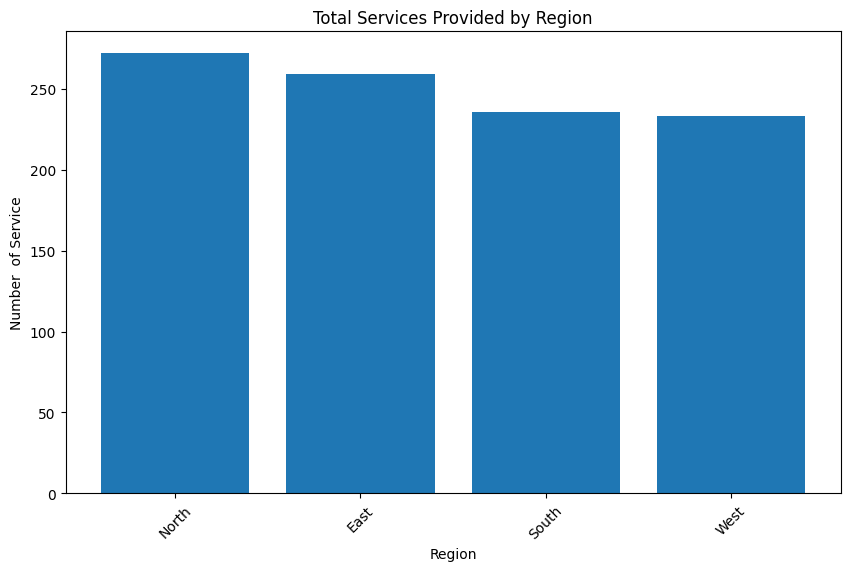

In [21]:
plt.figure(figsize=(10,6))
plt.bar(total_services_by_region.index,total_services_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel("Number  of Service")
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png')
plt.show()

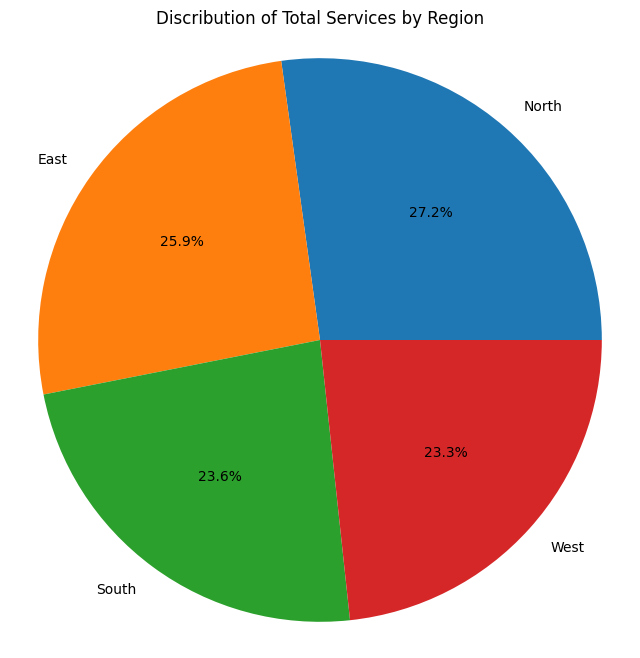

In [25]:
plt.figure(figsize=(8,8))
plt.pie(total_services_by_region, labels=total_services_by_region.index, autopct='%1.1f%%')
plt.title('Discribution of Total Services by Region')
plt.axis('equal')
plt.savefig('services_distribution_by_region.png')
plt.show()

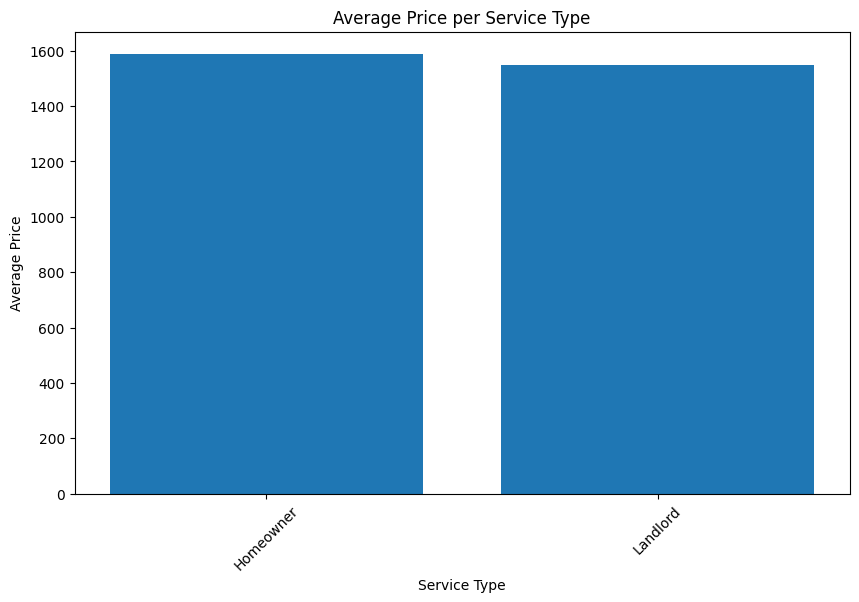

In [26]:
plt.figure(figsize=(10,6))
plt.bar(average_price_per_service.index, average_price_per_service.values)
plt.title('Average Price per Service Type')
plt.xlabel('Service Type')
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')
plt.show()

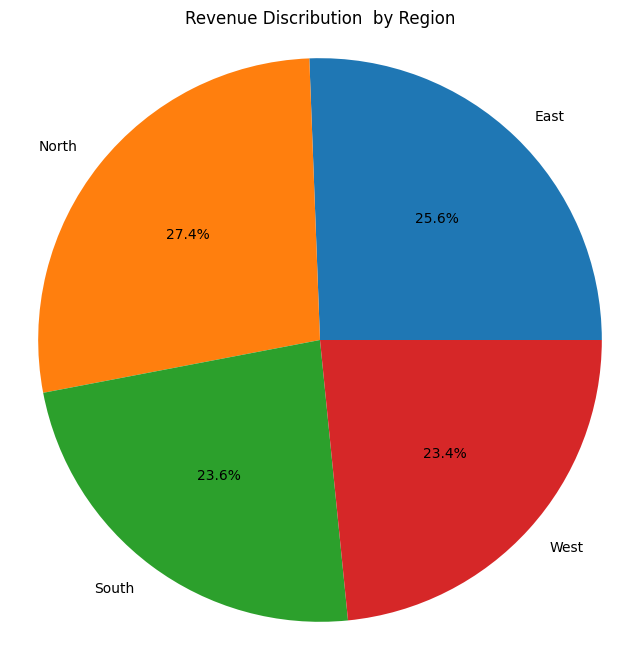

In [27]:
plt.figure(figsize=(8,8))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%')
plt.title('Revenue Discribution  by Region')
plt.axis('equal')
plt.savefig('revenue_distribution_by_region.png')
plt.show()

## Save output in file

In [28]:
with open('analysis_output.txt','w')as f:
  f.writelines(output)